In [10]:
"""
Data visualization
Author: Xionghui Xu
Date: July 11, 2025
"""
import os
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4 as nc
import geopandas as gpd
import rioxarray as rxr
from concurrent.futures import ThreadPoolExecutor
import warnings
from pathlib import Path

In [11]:
#### Here we set the configuration
resolution = "500"
region = [-180,180,-60,90]
data_path = f'data/run/'
shp_path = 'data/Shp/'
field_path = 'data/field/'
fig_path = 'fig/'

# Visualization

## 1. Data Export

In [ ]:
# df = pd.read_csv('data/field/field_all.csv', encoding='latin-1')

# file_path1 = f'data/DTB/DTB_Shangguan/BDTICM_M_1km_ll.tif'
# file_path2 = f'data/US/products_used/gNATSGO/densic_bedrock_depth_90m.tiff'
# file_path3 = f'data/US/products_used/gNATSGO/lithic_bedrock_depth_90m.tiff'
# file_path4 = f'data/US/products_used/gNATSGO/paralithic_bedrock_depth_90m.tiff'
# file_path5 = f'data/DTB/DTB_Pelletier/average_soil_and_sedimentary-deposit_thickness_remap_cm.nc'

# s1 = rxr.open_rasterio(file_path1)
# s2 = rxr.open_rasterio(file_path2)
# s3 = rxr.open_rasterio(file_path3)
# s4 = rxr.open_rasterio(file_path4)
# s5 = xr.open_dataset(file_path5)

# lat2 = df['Latitude']
# lon2 = df['Longitude']
# sd = df['SoilDepth_Numberline_cm']
# ssa = df['Same Site As']

# df2 = pd.DataFrame()

# # Renew the csv data in field
# j = 0
# for i in range(len(sd)):
#     if i!=(len(sd)-1):
#         if sd[i] > 0 and not isinstance(ssa[i], str) and lat2[i] != lat2[i + 1] and lon2[i] <= -66.9 and lon2[i] >= -125 and lat2[i] >= 24.4 and lat2[i] <= 49.4:
#             df2.at[j, 'Field'] = sd[i]
#             df2.at[j, 'lat'] = lat2[i]
#             df2.at[j, 'lon'] = lon2[i]
#             df2.at[j, 'number'] = int(j + 1)
#             j += 1
#     else:
#         if sd[i] > 0 and not isinstance(ssa[i], str) and lat2[i] != lat2[i - 1] and lon2[i] <= -66.9 and lon2[i] >= -125 and lat2[i] >= 24.4 and lat2[i] <= 49.4:
#             df2.at[j, 'Field'] = sd[i]
#             df2.at[j, 'lat'] = lat2[i]
#             df2.at[j, 'lon'] = lon2[i]
#             df2.at[j, 'number'] = int(j + 1)
#             j += 1

# print(j)
    

# # Index the corresponding location points in global data
# lat = df2['lat']
# lon = df2['lon']
# for i in range(j):
#     lat1_index = abs(s1.coords['y'] - lat[i]).argmin()
#     lon1_index = abs(s1.coords['x'] - lon[i]).argmin()
#     lat2_index = abs(s2.coords['y'] - lat[i]).argmin()
#     lon2_index = abs(s2.coords['x'] - lon[i]).argmin()
#     lat3_index = abs(s3.coords['y'] - lat[i]).argmin()
#     lon3_index = abs(s3.coords['x'] - lon[i]).argmin()
#     lat4_index = abs(s4.coords['y'] - lat[i]).argmin()
#     lon4_index = abs(s4.coords['x'] - lon[i]).argmin()
#     lat5_index = abs(s5.coords['lat'] - lat[i]).argmin()
#     lon5_index = abs(s5.coords['lon'] - lon[i]).argmin()

#     a1_value = s1[0, lat1_index, lon1_index].values
#     a2_value = s2[0, lat2_index, lon2_index].values
#     a3_value = s3[0, lat3_index, lon3_index].values
#     a4_value = s4[0, lat4_index, lon4_index].values
#     a5_value = s5['Band1'][lat5_index, lon5_index].values

#     df2.loc[i, 'Shangguan'] = a1_value
#     df2.loc[i, 'gNATSGO'] = np.min([a2_value,a3_value,a4_value])
#     df2.loc[i, 'Pelletier'] = a5_value

# df3 = df2.sort_values(by=['lon']).reset_index(drop=True)
# df3['num'] = range(len(df3['lat']))
# with open(f'{data_path}csv/field_DTB.csv','w') as f:
#     df3.to_csv(f)
# df3

34


,Field,lat,lon,number,Shangguan,gNATSGO,Pelletier,num
0,45.0,39.727300,-123.643300,1.0,1260.0,90.0,100.0,0
1,55.0,42.500000,-123.200000,12.0,934.0,75.0,0.0,1
2,300.0,43.500000,-122.700000,13.0,1173.0,111.0,100.0,2
3,50.0,39.153000,-122.348000,33.0,356.0,48.0,100.0,3
4,81.0,34.287000,-117.677000,8.0,1304.0,0.0,100.0,4
5,81.0,34.287000,-117.677000,3.0,1304.0,0.0,100.0,5
6,62.0,33.451700,-117.173500,2.0,743.0,101.0,100.0,6
7,25.0,33.810000,-116.680000,4.0,1637.0,29.0,0.0,7
8,35.0,33.810000,-116.680000,9.0,1637.0,29.0,0.0,8
9,45.0,38.110000,-109.920000,32.0,6160.0,48.0,0.0,9


## 2. Plotting

In [18]:
%matplotlib inline

import geopandas as gpd
from pylab import rcParams
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.geometry import box
from shapely.ops import unary_union
import cmaps

In [ ]:
os.makedirs(f'{fig_path}', exist_ok=True)

pd.set_option('display.max_columns', None)

font = {'family': 'Arial'}
matplotlib.rc('font', **font)

font_properties = fm.FontProperties(family='Arial', weight='bold')
shp = gpd.GeoDataFrame.from_file(shp_path+'US/USA_adm0.shp')
size = 0.0005

In [20]:
roots = pd.read_csv(f'{data_path}csv/field_DTB.csv', encoding='latin-1')

barplot = roots.copy()
barplot['Name'] = (barplot['num']).astype(str) # make name column string

barplot

,Unnamed: 0,Field,lat,lon,number,Shangguan,gNATSGO,Pelletier,num,Name
0,0,45.0,39.727300,-123.643300,1.0,1260.0,90.0,100.0,0,0
1,1,55.0,42.500000,-123.200000,12.0,934.0,75.0,0.0,1,1
2,2,300.0,43.500000,-122.700000,13.0,1173.0,111.0,100.0,2,2
3,3,50.0,39.153000,-122.348000,33.0,356.0,48.0,100.0,3,3
4,4,81.0,34.287000,-117.677000,8.0,1304.0,0.0,100.0,4,4
5,5,81.0,34.287000,-117.677000,3.0,1304.0,0.0,100.0,5,5
6,6,62.0,33.451700,-117.173500,2.0,743.0,101.0,100.0,6,6
7,7,25.0,33.810000,-116.680000,4.0,1637.0,29.0,0.0,7,7
8,8,35.0,33.810000,-116.680000,9.0,1637.0,29.0,0.0,8,8
9,9,45.0,38.110000,-109.920000,32.0,6160.0,48.0,0.0,9,9


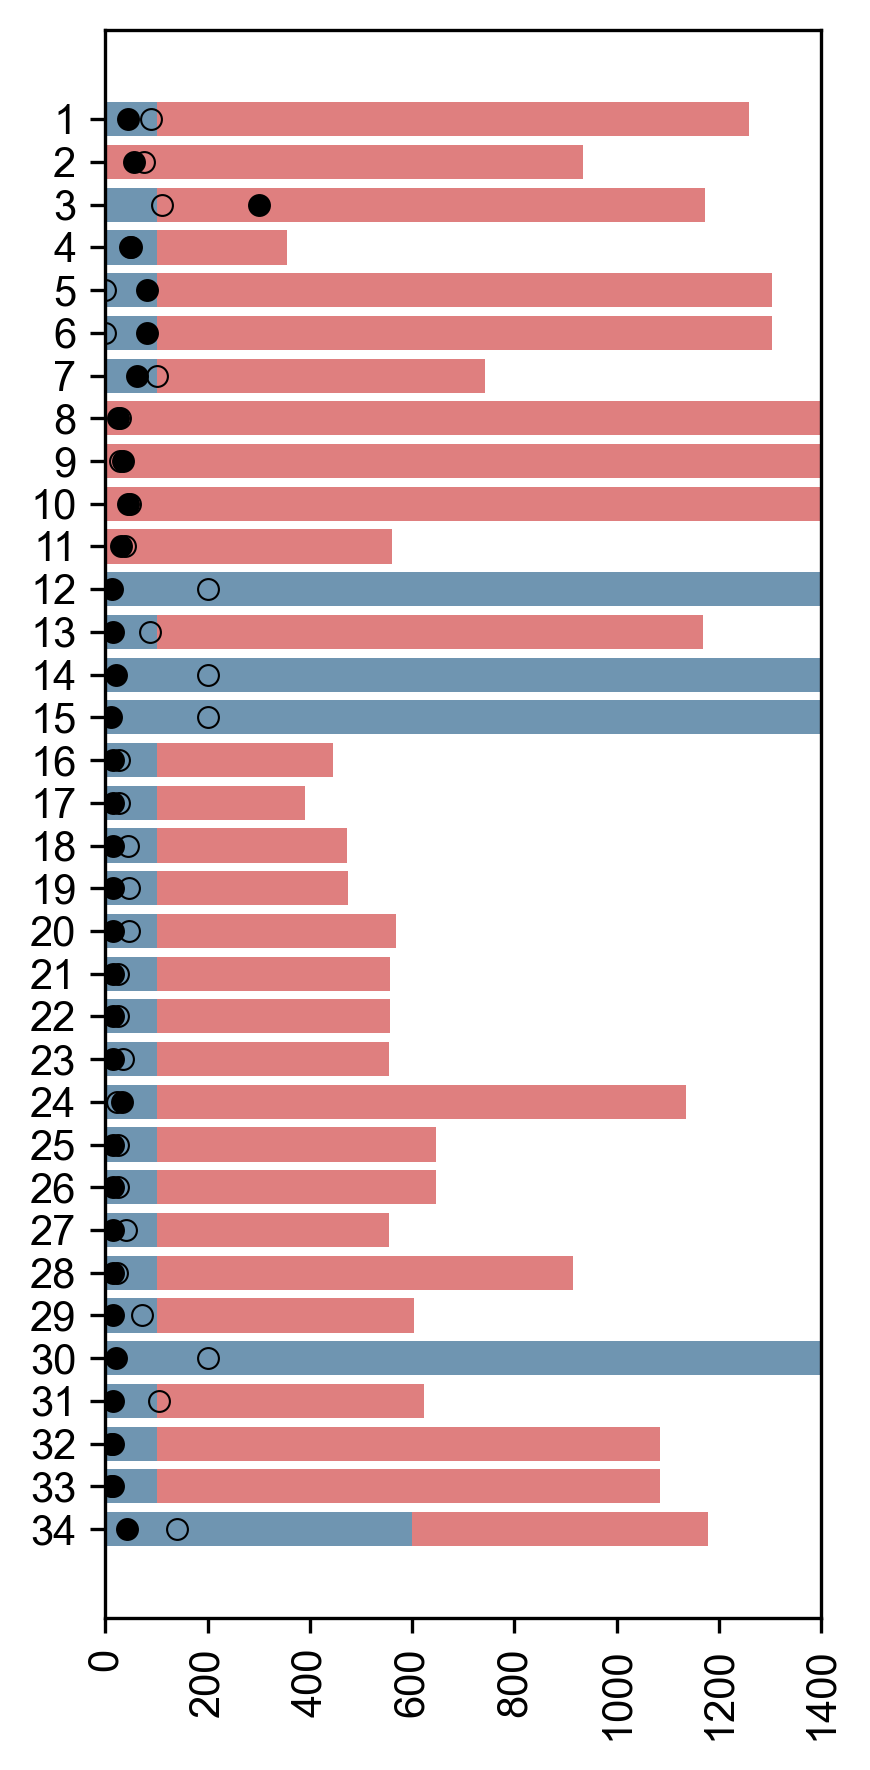

In [21]:
# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
# soillabels = list(np.arange(150, -50, step=-50))
dlabels = list(np.arange(0, 1600, step=200))
# labels = soillabels + dlabels
labels = dlabels

# Plot figure
plt.figure(figsize = (3, 6), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Shangguan'], color= '#c10000',alpha=0.5)
plt.barh(barplot['Name'],barplot['Pelletier'], color = '#6f95b1')

plt.plot(barplot['Field'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['gNATSGO'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

# plt.xticks(np.arange(-150, 2050, step=50), labels = labels)
plt.xticks(np.arange(0, 1600, step=200), labels = labels)
plt.yticks(np.arange(0, 34, 1), labels = np.arange(1, 35, 1))

# plt.xlim(-150, 2000)
plt.xlim(0, 1400)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.tight_layout()

## Uncomment for downloading fig
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/h1_fDTB.pdf", transparent=True)
plt.show()